In [375]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [376]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [377]:
#reading csv file
df = pd.read_csv('/content/gdrive/MyDrive/Project_DS 203/all_season_summary.csv')
df.head()


,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2020,1216492,Mumbai Indians v Chennai Super Kings,MI v CSK,"1st Match (N), Indian Premier League at Abu Dh...",MI,CSK,CSK,BOWL FIRST,162/9,166/5,162/9,166/5,CSK,Super Kings won by 5 wickets,2020-09-19T14:00Z,2020-09-21T23:59Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Rohit Sharma,MS Dhoni,Ambati Rayudu,"Chennai Super Kings 2, Mumbai Indians 0",False,20.0,162.0,9.0,19.0,19.2,166.0,5.0,21.0,"Ambati Rayudu, Faf du Plessis help CSK break M...","Saurabh Tiwary,Quinton de Kock","James Pattinson,Trent Boult","Rohit Sharma (BT),Quinton de Kock (WK),Suryaku...","Murali Vijay (BT),Shane Watson (AR),Faf du Ple...","Ambati Rayudu,Faf du Plessis","Lungi Ngidi,Deepak Chahar",19 September 2020 - night match (20-over match),Chris Gaffaney,Virender Sharma,Sundaram Ravi,Manu Nayyar,Ulhas Gandhe
1,2020,1216493,Delhi Capitals v Kings XI Punjab,DC v KXIP,"2nd Match (N), Indian Premier League at Dubai ...",DC,KXIP,KXIP,BOWL FIRST,157/8,157/8,157/8,157/8,DC,Match tied (Delhi Capitals won the one-over el...,2020-09-20T14:00Z,2020-09-22T23:59Z,392627,Dubai International Cricket Stadium,Shreyas Iyer,KL Rahul,Marcus Stoinis,"Delhi Capitals 2, Kings XI Punjab 0",True,20.0,157.0,8.0,19.0,20.0,157.0,8.0,18.0,Delhi Capitals claim Super-Over win after Marc...,"Marcus Stoinis,Shreyas Iyer","Ravichandran Ashwin,Kagiso Rabada","Prithvi Shaw (BT),Shikhar Dhawan (BT),Shimron ...","KL Rahul (WK),Mayank Agarwal (BT),Karun Nair (...","Mayank Agarwal,KL Rahul","Mohammed Shami,Sheldon Cottrell",20 September 2020 - night match (20-over match),Anil Chaudhary,Nitin Menon,Paul Reiffel,Javagal Srinath,Yeshwant Barde
2,2020,1216534,Sunrisers Hyderabad v Royal Challengers Bangalore,SRH v RCB,"3rd Match (N), Indian Premier League at Dubai ...",SRH,RCB,SRH,BOWL FIRST,163/5,153,153,163/5,RCB,RCB won by 10 runs,2020-09-21T14:00Z,2020-09-23T23:59Z,392627,Dubai International Cricket Stadium,David Warner,Virat Kohli,Yuzvendra Chahal,"Royal Challengers Bangalore 2, Sunrisers Hyder...",False,19.4,153.0,10.0,17.0,20.0,163.0,5.0,17.0,"Yuzvendra Chahal three-for, Sunrisers Hyderaba...","Jonny Bairstow,Manish Pandey","Abhishek Sharma,Vijay Shankar","David Warner (BT),Jonny Bairstow (WK),Manish P...","Devdutt Padikkal (BT),Aaron Finch (BT),Virat K...","Devdutt Padikkal,AB de Villiers","Yuzvendra Chahal,Shivam Dube",21 September 2020 - night match (20-over match),Anil Dandekar,Nitin Menon,Anil Chaudhary,Prakash Bhatt,Yeshwant Barde
3,2020,1216496,Rajasthan Royals v Chennai Super Kings,RR v CSK,"4th Match (N), Indian Premier League at Sharja...",RR,CSK,CSK,BOWL FIRST,216/7,200/6,216/7,200/6,RR,Royals won by 16 runs,2020-09-22T14:00Z,2020-09-24T23:59Z,59392,Sharjah Cricket Stadium,Steven Smith,MS Dhoni,Sanju Samson,"Rajasthan Royals 2, Chennai Super Kings 0",False,20.0,216.0,7.0,26.0,20.0,200.0,6.0,25.0,"Sanju Samson, Steven Smith, Jofra Archer help ...","Sanju Samson,Steven Smith","Rahul Tewatia,Jofra Archer","Yashasvi Jaiswal (BT),Steven Smith (BT),Sanju ...","Murali Vijay (BT),Shane Watson (AR),Faf du Ple...","Faf du Plessis,Shane Watson","Sam Curran,Deepak Chahar",22 September 2020 - night match (20-over match),Chettithody Shamshuddin,Vineet Kulkarni,KN Ananthapadmanabhan,Vengalil Narayan Kutty,Krishnamachari Srinivasan
4,2020,1216508,Kolkata Knight Riders v Mumbai Indians,KKR v MI,"5th Match (N), Indian Premier League at Abu Dh...",KKR,MI,KKR,BOWL FIRST,195/5,146/9,146/9,195/5,MI,Mum Indians won by 49 runs,2020-09-23T14:00Z,2020-09-25T23:59Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Dinesh Karthik,Rohi

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            824 non-null    int64  
 1   id                824 non-null    int64  
 2   name              824 non-null    object 
 3   short_name        824 non-null    object 
 4   description       824 non-null    object 
 5   home_team         824 non-null    object 
 6   away_team         824 non-null    object 
 7   toss_won          824 non-null    object 
 8   decision          824 non-null    object 
 9   1st_inning_score  816 non-null    object 
 10  2nd_inning_score  814 non-null    object 
 11  home_score        816 non-null    object 
 12  away_score        814 non-null    object 
 13  winner            824 non-null    object 
 14  result            824 non-null    object 
 15  start_date        824 non-null    object 
 16  end_date          824 non-null    object 
 1

In [379]:
#dropping the column which are of less use for EDA venue wise
df=df.drop(["description","away_score","home_score","points","umpire1","umpire2","tv_umpire","referee","reserve_umpire","match_days","highlights","home_key_batsman","home_key_bowler","home_playx1","away_playx1","away_key_batsman","away_key_bowler"],axis=1)
df=df.drop(['id','name','end_date'],axis=1)
df.head()

,season,short_name,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner,result,start_date,venue_id,venue_name,home_captain,away_captain,pom,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries
0,2020,MI v CSK,MI,CSK,CSK,BOWL FIRST,162/9,166/5,CSK,Super Kings won by 5 wickets,2020-09-19T14:00Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Rohit Sharma,MS Dhoni,Ambati Rayudu,False,20.0,162.0,9.0,19.0,19.2,166.0,5.0,21.0
1,2020,DC v KXIP,DC,KXIP,KXIP,BOWL FIRST,157/8,157/8,DC,Match tied (Delhi Capitals won the one-over el...,2020-09-20T14:00Z,392627,Dubai International Cricket Stadium,Shreyas Iyer,KL Rahul,Marcus Stoinis,True,20.0,157.0,8.0,19.0,20.0,157.0,8.0,18.0
2,2020,SRH v RCB,SRH,RCB,SRH,BOWL FIRST,163/5,153,RCB,RCB won by 10 runs,2020-09-21T14:00Z,392627,Dubai International Cricket Stadium,David Warner,Virat Kohli,Yuzvendra Chahal,False,19.4,153.0,10.0,17.0,20.0,163.0,5.0,17.0
3,2020,RR v CSK,RR,CSK,CSK,BOWL FIRST,216/7,200/6,RR,Royals won by 16 runs,2020-09-22T14:00Z,59392,Sharjah Cricket Stadium,Steven Smith,MS Dhoni,Sanju Samson,False,20.0,216.0,7.0,26.0,20.0,200.0,6.0,25.0
4,2020,KKR v MI,KKR,MI,KKR,BOWL FIRST,195/5,146/9,MI,Mum Indians won by 49 runs,2020-09-23T14:00Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Dinesh Karthik,Rohit Sharma,Rohit Sharma,False,20.0,146.0,9.0,20.0,20.0,195.0,5.0,22.0


In [380]:
df.shape

(824, 25)

In [381]:
#Statistics of the numerical data
df.describe()

,season,venue_id,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries
count,824.000000,824.000000,816.000000,816.000000,816.000000,816.000000,814.000000,814.000000,814.000000,814.000000
mean,2013.904126,112597.628641,19.044485,156.525735,5.720588,19.113971,19.022604,153.595823,5.907862,18.660934
std,3.665448,139538.918235,2.200746,31.773768,2.413737,5.877732,2.195300,30.749074,2.540227,5.513086
min,2008.000000,57851.000000,1.100000,2.000000,0.000000,0.000000,3.200000,41.000000,0.000000,3.000000
25%,2011.000000,57991.000000,19.200000,137.000000,4.000000,15.000000,19.100000,135.000000,4.000000,15.000000
50%,2014.000000,58142.000000,20.000000,158.000000,6.000000,19.000000,20.000000,155.000000,6.000000,18.000000
75%,2017.000000,59079.000000,20.000000,178.000000,8.000000,23.000000,20.000000,174.000000,8.000000,22.000000
max,2020.000000,601879.000000,20.000000,263.000000,10.000000,42.000000,20.000000,245.000000,10.000000,39.000000


In [382]:
#Finding the all unique Venue of matches
venue=df['venue_name'].unique()
venue

array(['Sheikh Zayed Stadium, Abu Dhabi',
       'Dubai International Cricket Stadium', 'Sharjah Cricket Stadium',
       'MA Chidambaram Stadium, Chepauk, Chennai',
       'Eden Gardens, Kolkata', 'Wankhede Stadium, Mumbai',
       'Sawai Mansingh Stadium, Jaipur', 'Arun Jaitley Stadium, Delhi',
       'M.Chinnaswamy Stadium, Bengaluru',
       'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
       'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
       'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
       'Maharashtra Cricket Association Stadium, Pune',
       'Holkar Cricket Stadium, Indore',
       'Saurashtra Cricket Association Stadium, Rajkot',
       'Green Park, Kanpur',
       'Shaheed Veer Narayan Singh International Stadium, Raipur',
       'Sardar Patel (Gujarat) Stadium, Motera, Ahmedabad',
       'Brabourne Stadium, Mumbai',
       'JSCA International Stadium Complex, Ranchi',
       'Barabati Stadium, Cuttack',
       'H

In [383]:
#Finding the number of matches played in a particular Venue
df['venue_name'].value_counts()

M.Chinnaswamy Stadium, Bengaluru                                      83
Eden Gardens, Kolkata                                                 79
Arun Jaitley Stadium, Delhi                                           75
Wankhede Stadium, Mumbai                                              73
Rajiv Gandhi International Stadium, Uppal, Hyderabad                  64
MA Chidambaram Stadium, Chepauk, Chennai                              57
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh      56
Sawai Mansingh Stadium, Jaipur                                        47
Maharashtra Cricket Association Stadium, Pune                         38
Dubai International Cricket Stadium                                   33
Sheikh Zayed Stadium, Abu Dhabi                                       29
Sharjah Cricket Stadium                                               18
Dr DY Patil Sports Academy, Mumbai                                    17
Kingsmead, Durban                                  

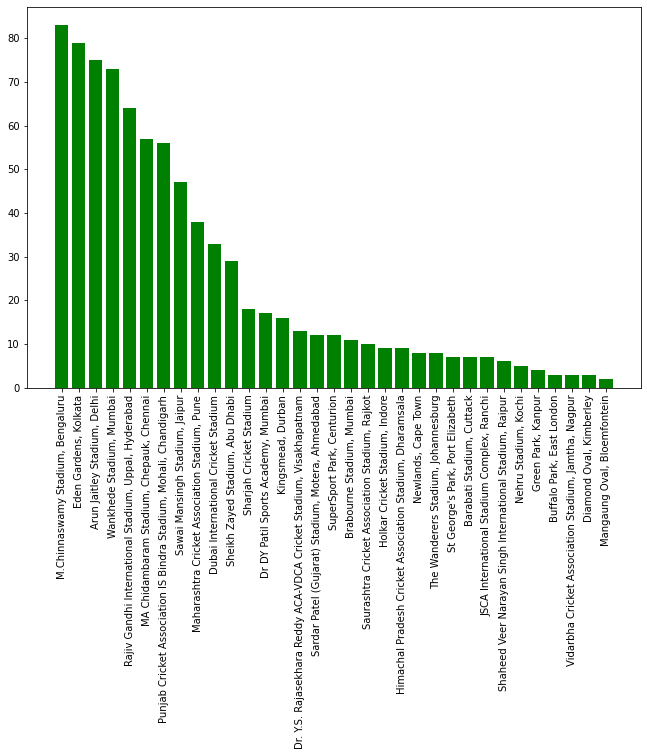

In [384]:
#Plotting total number of matches played on a particular venue
plt.figure(figsize=(11,7))
plt.bar(list(df['venue_name'].value_counts().keys()),list(df['venue_name'].value_counts()),color='g')
plt.xticks(rotation=90)
plt.show()

In [385]:
#finding the data where the team that wins the toss also wins the match
df1=df[df['toss_won']==df['winner']]
df1.head()

,season,short_name,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner,result,start_date,venue_id,venue_name,home_captain,away_captain,pom,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries
0,2020,MI v CSK,MI,CSK,CSK,BOWL FIRST,162/9,166/5,CSK,Super Kings won by 5 wickets,2020-09-19T14:00Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Rohit Sharma,MS Dhoni,Ambati Rayudu,False,20.0,162.0,9.0,19.0,19.2,166.0,5.0,21.0
8,2020,RR v KXIP,RR,KXIP,RR,BOWL FIRST,223/2,226/6,RR,Royals won by 4 wickets,2020-09-27T14:00Z,59392,Sharjah Cricket Stadium,Steven Smith,KL Rahul,Sanju Samson,False,19.3,226.0,6.0,32.0,20.0,223.0,2.0,31.0
13,2020,CSK v SRH,CSK,SRH,SRH,BAT FIRST,164/5,157/5,SRH,Sunrisers won by 7 runs,2020-10-02T14:00Z,392627,Dubai International Cricket Stadium,MS Dhoni,David Warner,Priyam Garg,False,20.0,157.0,5.0,19.0,20.0,164.0,5.0,21.0
16,2020,MI v SRH,MI,SRH,MI,BAT FIRST,208/5,174/7,MI,Mum Indians won by 34 runs,2020-10-04T10:00Z,59392,Sharjah Cricket Stadium,Rohit Sharma,David Warner,Trent Boult,False,20.0,208.0,5.0,29.0,20.0,174.0,7.0,19.0
19,2020,MI v RR,MI,RR,MI,BAT FIRST,193/4,136,MI,Mum Indians won by 57 runs,2020-10-06T14:00Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Rohit Sharma,Steven Smith,Suryakumar Yadav,False,20.0,193.0,4.0,26.0,18.1,136.0,10.0,17.0


In [386]:
df1.shape

(418, 25)

In [387]:
#finding the number of times where the team that wins the toss also wins the match on that particular venue
df1['venue_name'].value_counts()

Eden Gardens, Kolkata                                                 43
M.Chinnaswamy Stadium, Bengaluru                                      43
Arun Jaitley Stadium, Delhi                                           38
Wankhede Stadium, Mumbai                                              37
MA Chidambaram Stadium, Chepauk, Chennai                              30
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh      27
Sawai Mansingh Stadium, Jaipur                                        25
Maharashtra Cricket Association Stadium, Pune                         23
Rajiv Gandhi International Stadium, Uppal, Hyderabad                  21
Sheikh Zayed Stadium, Abu Dhabi                                       15
Dubai International Cricket Stadium                                   11
Sharjah Cricket Stadium                                                9
Dr DY Patil Sports Academy, Mumbai                                     9
Kingsmead, Durban                                  

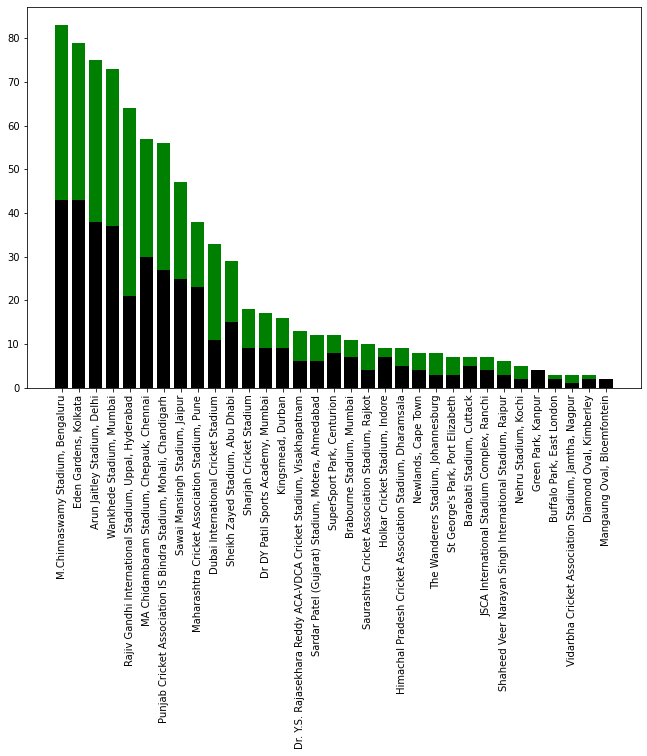

In [388]:
#Plotting the total number of matches played in green on that venue and number of times toss winner also wins the match on that venue in black
plt.figure(figsize=(11,7))
plt.bar(list(df['venue_name'].value_counts().keys()),list(df['venue_name'].value_counts()),color='g')
plt.bar(list(df1['venue_name'].value_counts().keys()),list(df1['venue_name'].value_counts()),color='k')
plt.xticks(rotation=90)
plt.show()

In [389]:
#Finding data corresponding to when the home team wins the match on its venue
df2=df[df['home_team']==df['winner']]

In [390]:
df2.head()

,season,short_name,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner,result,start_date,venue_id,venue_name,home_captain,away_captain,pom,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries
1,2020,DC v KXIP,DC,KXIP,KXIP,BOWL FIRST,157/8,157/8,DC,Match tied (Delhi Capitals won the one-over el...,2020-09-20T14:00Z,392627,Dubai International Cricket Stadium,Shreyas Iyer,KL Rahul,Marcus Stoinis,True,20.0,157.0,8.0,19.0,20.0,157.0,8.0,18.0
3,2020,RR v CSK,RR,CSK,CSK,BOWL FIRST,216/7,200/6,RR,Royals won by 16 runs,2020-09-22T14:00Z,59392,Sharjah Cricket Stadium,Steven Smith,MS Dhoni,Sanju Samson,False,20.0,216.0,7.0,26.0,20.0,200.0,6.0,25.0
5,2020,KXIP v RCB,KXIP,RCB,RCB,BOWL FIRST,206/3,109,KXIP,Kings XI won by 97 runs,2020-09-24T14:00Z,392627,Dubai International Cricket Stadium,KL Rahul,Virat Kohli,KL Rahul,False,20.0,206.0,3.0,28.0,17.0,109.0,10.0,13.0
7,2020,KKR v SRH,KKR,SRH,SRH,BAT FIRST,142/4,145/3,KKR,KKR won by 7 wickets,2020-09-26T14:00Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Dinesh Karthik,David Warner,Shubman Gill,False,18.0,145.0,3.0,18.0,20.0,142.0,4.0,12.0
8,2020,RR v KXIP,RR,KXIP,RR,BOWL FIRST,223/2,226/6,RR,Royals won by 4 wickets,2020-09-27T14:00Z,59392,Sharjah Cricket Stadium,Steven Smith,KL Rahul,Sanju Samson,False,19.3,226.0,6.0,32.0,20.0,223.0,2.0,31.0


In [391]:
#Counting number of times home team wins the match on its venue
df2['venue_name'].value_counts()

Eden Gardens, Kolkata                                                 46
Wankhede Stadium, Mumbai                                              44
MA Chidambaram Stadium, Chepauk, Chennai                              41
M.Chinnaswamy Stadium, Bengaluru                                      39
Rajiv Gandhi International Stadium, Uppal, Hyderabad                  35
Arun Jaitley Stadium, Delhi                                           33
Sawai Mansingh Stadium, Jaipur                                        32
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh      30
Sheikh Zayed Stadium, Abu Dhabi                                       14
Maharashtra Cricket Association Stadium, Pune                         14
Dubai International Cricket Stadium                                   14
Sharjah Cricket Stadium                                                9
Brabourne Stadium, Mumbai                                              8
Kingsmead, Durban                                  

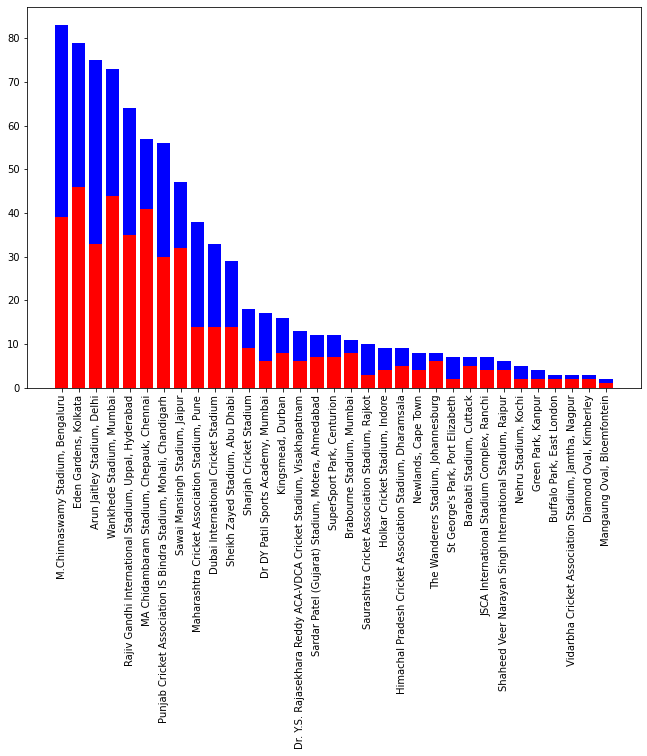

In [392]:
#Plotting the total number of matches played in Blue on that venue and number of times home team wins the match on its venue in red
plt.figure(figsize=(11,7))
plt.bar(list(df['venue_name'].value_counts().keys()),list(df['venue_name'].value_counts()),color='b')
plt.bar(list(df2['venue_name'].value_counts().keys()),list(df2['venue_name'].value_counts()),color='r')
plt.xticks(rotation=90)
plt.show()

In [393]:
#Finding data corresponding to when the first batting team wins the match
df3=df[(df['decision']=="BOWL FIRST")&(df['toss_won']!=df['winner'])]
df4=df[(df['decision']=="BAT FIRST")&(df['toss_won']==df['winner'])]

In [394]:
#Combining df3 and df4 and also reseting the index
frames = [df3, df4]
batfirst_won = pd.concat(frames)
batfirst_won.reset_index(drop =True)

,season,short_name,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner,result,start_date,venue_id,venue_name,home_captain,away_captain,pom,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries
0,2020,DC v KXIP,DC,KXIP,KXIP,BOWL FIRST,157/8,157/8,DC,Match tied (Delhi Capitals won the one-over el...,2020-09-20T14:00Z,392627,Dubai International Cricket Stadium,Shreyas Iyer,KL Rahul,Marcus Stoinis,True,20.0,157.0,8.0,19.0,20.0,157.0,8.0,18.0
1,2020,SRH v RCB,SRH,RCB,SRH,BOWL FIRST,163/5,153,RCB,RCB won by 10 runs,2020-09-21T14:00Z,392627,Dubai International Cricket Stadium,David Warner,Virat Kohli,Yuzvendra Chahal,False,19.4,153.0,10.0,17.0,20.0,163.0,5.0,17.0
2,2020,RR v CSK,RR,CSK,CSK,BOWL FIRST,216/7,200/6,RR,Royals won by 16 runs,2020-09-22T14:00Z,59392,Sharjah Cricket Stadium,Steven Smith,MS Dhoni,Sanju Samson,False,20.0,216.0,7.0,26.0,20.0,200.0,6.0,25.0
3,2020,KKR v MI,KKR,MI,KKR,BOWL FIRST,195/5,146/9,MI,Mum Indians won by 49 runs,2020-09-23T14:00Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Dinesh Karthik,Rohit Sharma,Rohit Sharma,False,20.0,146.0,9.0,20.0,20.0,195.0,5.0,22.0
4,2020,KXIP v RCB,KXIP,RCB,RCB,BOWL FIRST,206/3,109,KXIP,Kings XI won by 97 runs,2020-09-24T14:00Z,392627,Dubai International Cricket Stadium,KL Rahul,Virat Kohli,KL Rahul,False,20.0,206.0,3.0,28.0,17.0,109.0,10.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,2008,KKR v RCB,KKR,RCB,KKR,BAT FIRST,129/7,124/4,KKR,KKR won by 5 runs,2008-05-08T14:30Z,57980,"Eden Gardens, Kolkata",Sourav Ganguly,Rahul Dravid,Sourav Ganguly,False,16.0,129.0,7.0,17.0,16.0,124.0,4.0,17.0
365,2008,DC v KKR,SRH,KKR,KKR,BAT FIRST,204/4,181/7,KKR,KKR won by 23 runs,2008-05-11T10:30Z,58142,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Adam Gilchrist,Sourav Ganguly,Sourav Ganguly,False,20.0,181.0,7.0,24.0,20.0,204.0,4.0,30.0
366,2008,KKR v DC,KKR,DC,KKR,BAT FIRST,133/6,110,KKR,KKR won by 23 runs,2008-05-13T14:30Z,57980,"Eden Gardens, Kolkata",Sourav Ganguly,Virender Sehwag,Shoaib Akhtar,False,20.0,133.0,6.0,13.0,17.5,110.0,10.0,13.0
367,2008,CSK v RCB,CSK,RCB,RCB,BAT FIRST,126/8,112/8,RCB,RCB won by 14 runs,2008-05-21T14:30Z,58008,"MA Chidambaram Stadium, Chepauk, Chennai",MS Dhoni,Rahul Dravid,Anil Kumble,False,20.0,112.0,8.0,12.0,20.0,126.0,8.0,15.0


In [395]:
#Counting number of times first batting team wins the match on a particular venue
batfirst_won['venue_name'].value_counts()

M.Chinnaswamy Stadium, Bengaluru                                      37
Wankhede Stadium, Mumbai                                              36
MA Chidambaram Stadium, Chepauk, Chennai                              35
Arun Jaitley Stadium, Delhi                                           34
Eden Gardens, Kolkata                                                 30
Rajiv Gandhi International Stadium, Uppal, Hyderabad                  27
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh      24
Dubai International Cricket Stadium                                   19
Maharashtra Cricket Association Stadium, Pune                         18
Sawai Mansingh Stadium, Jaipur                                        15
Sheikh Zayed Stadium, Abu Dhabi                                       13
Kingsmead, Durban                                                      8
Sharjah Cricket Stadium                                                7
Dr DY Patil Sports Academy, Mumbai                 

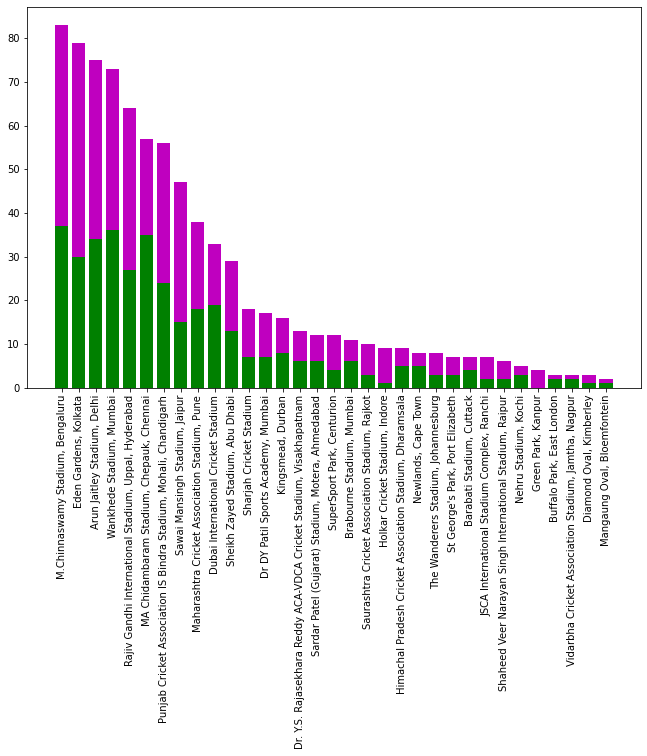

In [396]:
#Plotting the total number of matches played in magenta on that venue and number of times first batting team wins the match on that venue in green
plt.figure(figsize=(11,7))
plt.bar(list(df['venue_name'].value_counts().keys()),list(df['venue_name'].value_counts()),color='m')
plt.bar(list(batfirst_won['venue_name'].value_counts().keys()),list(batfirst_won['venue_name'].value_counts()),color='g')
plt.xticks(rotation=90)
plt.show()

In [397]:
#Finding the data corresponding to when the team that bowls first also wins the match on that particular venue 
df5=df[(df['decision']=="BOWL FIRST")&(df['toss_won']==df['winner'])]
df6=df[(df['decision']=="BAT FIRST")&(df['toss_won']!=df['winner'])]
frames1 = [df5, df6]

ballfirst_won = pd.concat(frames1)
ballfirst_won.reset_index(drop =True)

,season,short_name,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner,result,start_date,venue_id,venue_name,home_captain,away_captain,pom,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries
0,2020,MI v CSK,MI,CSK,CSK,BOWL FIRST,162/9,166/5,CSK,Super Kings won by 5 wickets,2020-09-19T14:00Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Rohit Sharma,MS Dhoni,Ambati Rayudu,False,20.0,162.0,9.0,19.0,19.2,166.0,5.0,21.0
1,2020,RR v KXIP,RR,KXIP,RR,BOWL FIRST,223/2,226/6,RR,Royals won by 4 wickets,2020-09-27T14:00Z,59392,Sharjah Cricket Stadium,Steven Smith,KL Rahul,Sanju Samson,False,19.3,226.0,6.0,32.0,20.0,223.0,2.0,31.0
2,2020,RR v SRH,RR,SRH,SRH,BOWL FIRST,154/6,156/2,SRH,Sunrisers won by 8 wickets,2020-10-22T14:00Z,392627,Dubai International Cricket Stadium,Steven Smith,David Warner,Manish Pandey,False,20.0,154.0,6.0,16.0,18.1,156.0,2.0,21.0
3,2020,CSK v MI,CSK,MI,MI,BOWL FIRST,114/9,116/0,MI,Mum Indians won by 10 wickets,2020-10-23T14:00Z,59392,Sharjah Cricket Stadium,MS Dhoni,Kieron Pollard,Trent Boult,False,20.0,114.0,9.0,12.0,12.2,116.0,0.0,18.0
4,2020,KKR v KXIP,KKR,KXIP,KXIP,BOWL FIRST,149/9,150/2,KXIP,Kings XI won by 8 wickets,2020-10-26T14:00Z,59392,Sharjah Cricket Stadium,Eoin Morgan,KL Rahul,Chris Gayle,False,20.0,149.0,9.0,20.0,18.5,150.0,2.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,2008,KKR v CSK,KKR,CSK,KKR,BAT FIRST,149/5,55/0,CSK,Super Kings won by 3 runs (D/L method),2008-05-18T10:30Z,57980,"Eden Gardens, Kolkata",Sourav Ganguly,MS Dhoni,Makhaya Ntini,False,20.0,149.0,5.0,18.0,8.0,55.0,0.0,8.0
444,2008,DC v RCB,SRH,RCB,SRH,BAT FIRST,165,171/5,RCB,RCB won by 5 wickets (with 6 balls remaining),2008-05-25T10:30Z,58142,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Adam Gilchrist,Rahul Dravid,Vinay Kumar,False,20.0,165.0,10.0,22.0,19.0,171.0,5.0,26.0
445,2008,KKR v KXIP,KKR,KXIP,KXIP,BAT FIRST,174/6,175/7,KKR,KKR won by 3 wickets (with 2 balls remaining),2008-05-25T14:30Z,57980,"Eden Gardens, Kolkata",Sourav Ganguly,Yuvraj Singh,Umar Gul,False,19.4,175.0,7.0,26.0,20.0,174.0,6.0,22.0
446,2008,DC v CSK,SRH,CSK,SRH,BAT FIRST,147/8,148/3,CSK,Super Kings won by 7 wickets (with 4 balls rem...,2008-05-27T14:30Z,58142,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Adam Gilchrist,MS Dhoni,Suresh Raina,False,20.0,147.0,8.0,16.0,19.2,148.0,3.0,19.0


In [398]:
#counting the number of times the team that bowls first also win the match on that particular venue
ballfirst_won['venue_name'].value_counts()

Eden Gardens, Kolkata                                                 47
M.Chinnaswamy Stadium, Bengaluru                                      44
Arun Jaitley Stadium, Delhi                                           40
Rajiv Gandhi International Stadium, Uppal, Hyderabad                  37
Wankhede Stadium, Mumbai                                              37
Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh      32
Sawai Mansingh Stadium, Jaipur                                        32
MA Chidambaram Stadium, Chepauk, Chennai                              22
Maharashtra Cricket Association Stadium, Pune                         20
Sheikh Zayed Stadium, Abu Dhabi                                       16
Dubai International Cricket Stadium                                   14
Sharjah Cricket Stadium                                               11
Dr DY Patil Sports Academy, Mumbai                                    10
Holkar Cricket Stadium, Indore                     

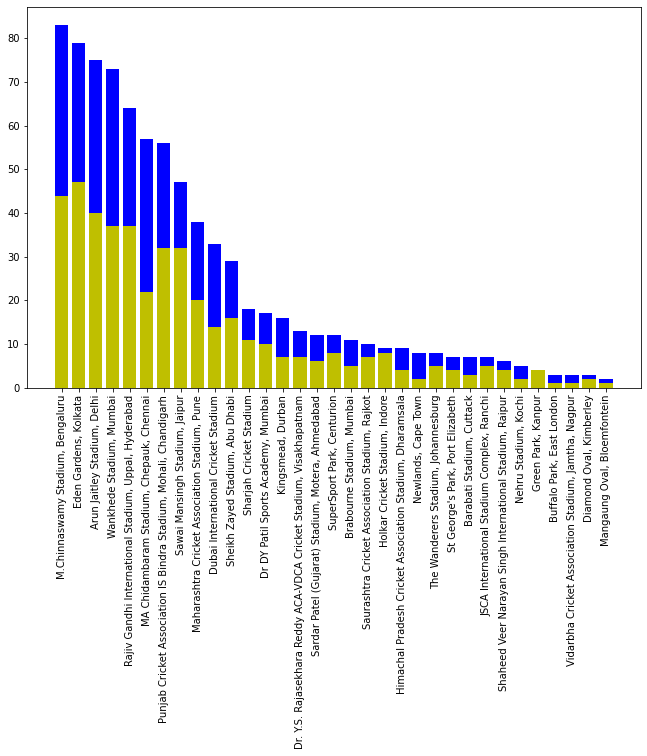

In [399]:
#Plotting the total number of matches played in blue on that venue and number of times first bowling team wins the match on that venue in yellow
plt.figure(figsize=(11,7))
plt.bar(list(df['venue_name'].value_counts().keys()),list(df['venue_name'].value_counts()),color='b')
plt.bar(list(ballfirst_won['venue_name'].value_counts().keys()),list(ballfirst_won['venue_name'].value_counts()),color='y')
plt.xticks(rotation=90)
plt.show()

In [400]:
#for finding total number of runs scored,boundary scored,wickets fallen on a particular venue, making the column corresponding to each for every match
df['total_runs'] = df['home_runs']+df['away_runs']
df['total_wickets'] = df['home_wickets'] + df['away_wickets']
df['total_boundary'] = df['away_boundaries']+ df['home_boundaries']
df.head()

,season,short_name,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner,result,start_date,venue_id,venue_name,home_captain,away_captain,pom,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,total_runs,total_wickets,total_boundary
0,2020,MI v CSK,MI,CSK,CSK,BOWL FIRST,162/9,166/5,CSK,Super Kings won by 5 wickets,2020-09-19T14:00Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Rohit Sharma,MS Dhoni,Ambati Rayudu,False,20.0,162.0,9.0,19.0,19.2,166.0,5.0,21.0,328.0,14.0,40.0
1,2020,DC v KXIP,DC,KXIP,KXIP,BOWL FIRST,157/8,157/8,DC,Match tied (Delhi Capitals won the one-over el...,2020-09-20T14:00Z,392627,Dubai International Cricket Stadium,Shreyas Iyer,KL Rahul,Marcus Stoinis,True,20.0,157.0,8.0,19.0,20.0,157.0,8.0,18.0,314.0,16.0,37.0
2,2020,SRH v RCB,SRH,RCB,SRH,BOWL FIRST,163/5,153,RCB,RCB won by 10 runs,2020-09-21T14:00Z,392627,Dubai International Cricket Stadium,David Warner,Virat Kohli,Yuzvendra Chahal,False,19.4,153.0,10.0,17.0,20.0,163.0,5.0,17.0,316.0,15.0,34.0
3,2020,RR v CSK,RR,CSK,CSK,BOWL FIRST,216/7,200/6,RR,Royals won by 16 runs,2020-09-22T14:00Z,59392,Sharjah Cricket Stadium,Steven Smith,MS Dhoni,Sanju Samson,False,20.0,216.0,7.0,26.0,20.0,200.0,6.0,25.0,416.0,13.0,51.0
4,2020,KKR v MI,KKR,MI,KKR,BOWL FIRST,195/5,146/9,MI,Mum Indians won by 49 runs,2020-09-23T14:00Z,59396,"Sheikh Zayed Stadium, Abu Dhabi",Dinesh Karthik,Rohit Sharma,Rohit Sharma,False,20.0,146.0,9.0,20.0,20.0,195.0,5.0,22.0,341.0,14.0,42.0


In [401]:
#Dropping the unnecessary column and keeping column only corresponding to total runs, total boundary , total wickets
df=df.drop(['1st_inning_score','2nd_inning_score','venue_id','season','home_overs','home_runs','home_wickets','super_over','home_boundaries','away_overs','away_runs','away_boundaries','away_wickets'],axis=1)

In [402]:
#summing total runs, total boundary,total wickets after grouping by venue
temp=df.groupby(['venue_name']).sum()

In [403]:
#displaying temp
temp

,total_runs,total_wickets,total_boundary
venue_name,,,
"Arun Jaitley Stadium, Delhi",22857.0,868.0,2847.0
"Barabati Stadium, Cuttack",2268.0,82.0,278.0
"Brabourne Stadium, Mumbai",3842.0,126.0,475.0
"Buffalo Park, East London",799.0,38.0,83.0
"Diamond Oval, Kimberley",897.0,39.0,96.0
"Dr DY Patil Sports Academy, Mumbai",4810.0,216.0,563.0
"Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam",3746.0,163.0,445.0
Dubai International Cricket Stadium,10402.0,385.0,1208.0
"Eden Gardens, Kolkata",23658.0,878.0,3034.0


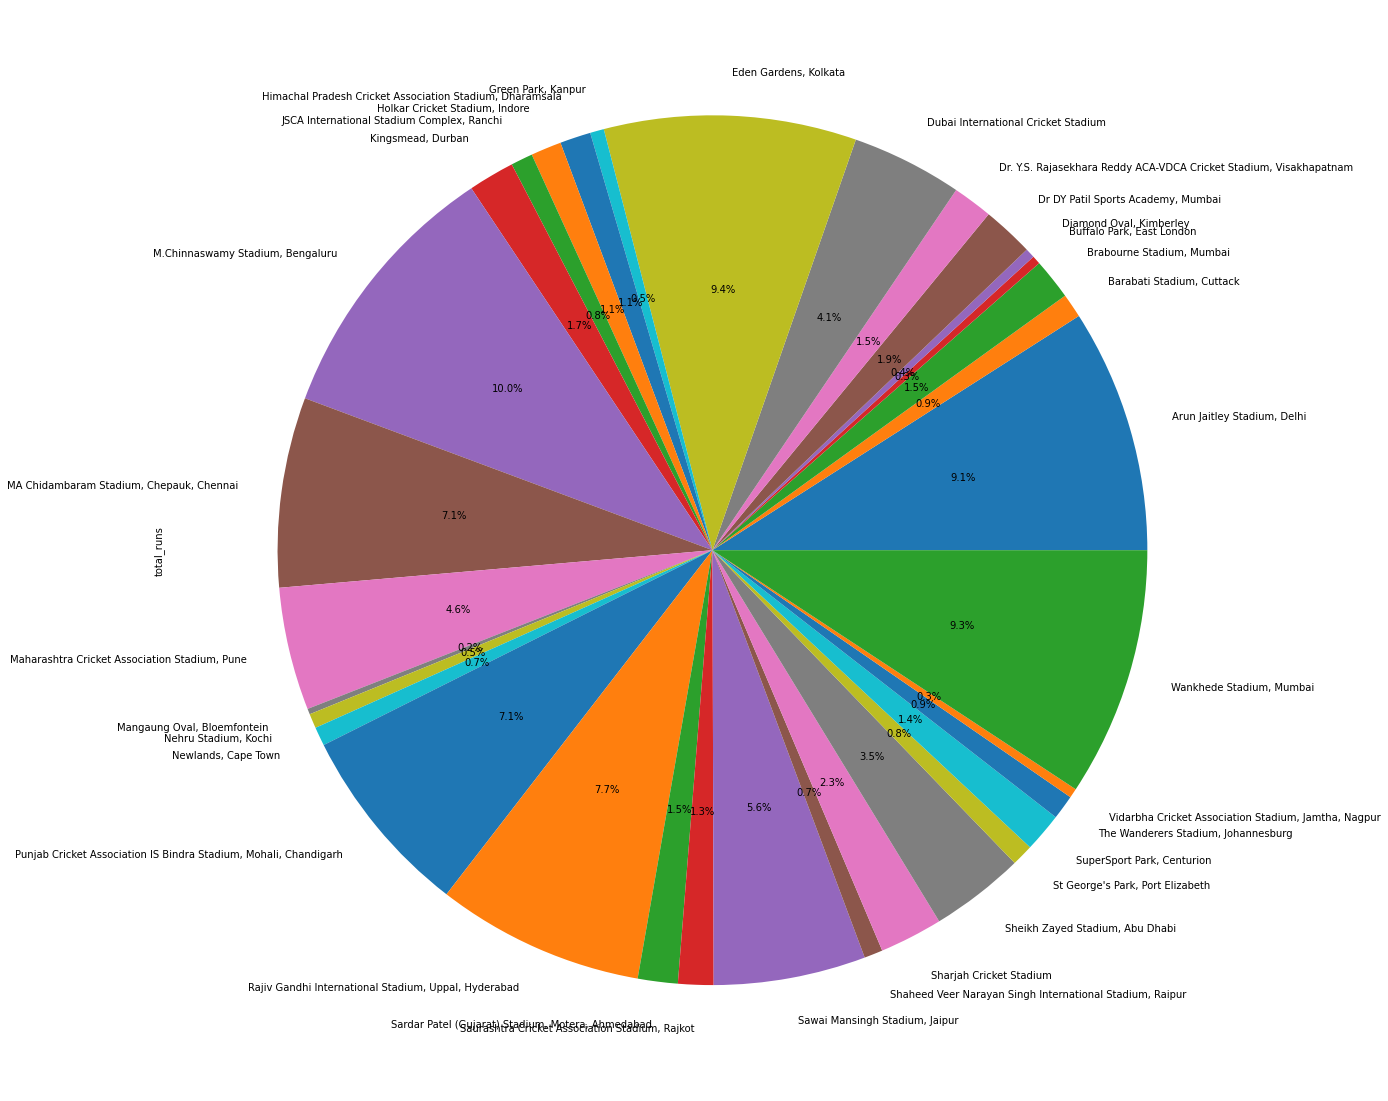

In [404]:
#Plotting total number of runs scored on a venue on a pie chart
plot = temp.plot.pie(y='total_runs', figsize=(20, 20),legend =False,autopct='%0.1f%%')

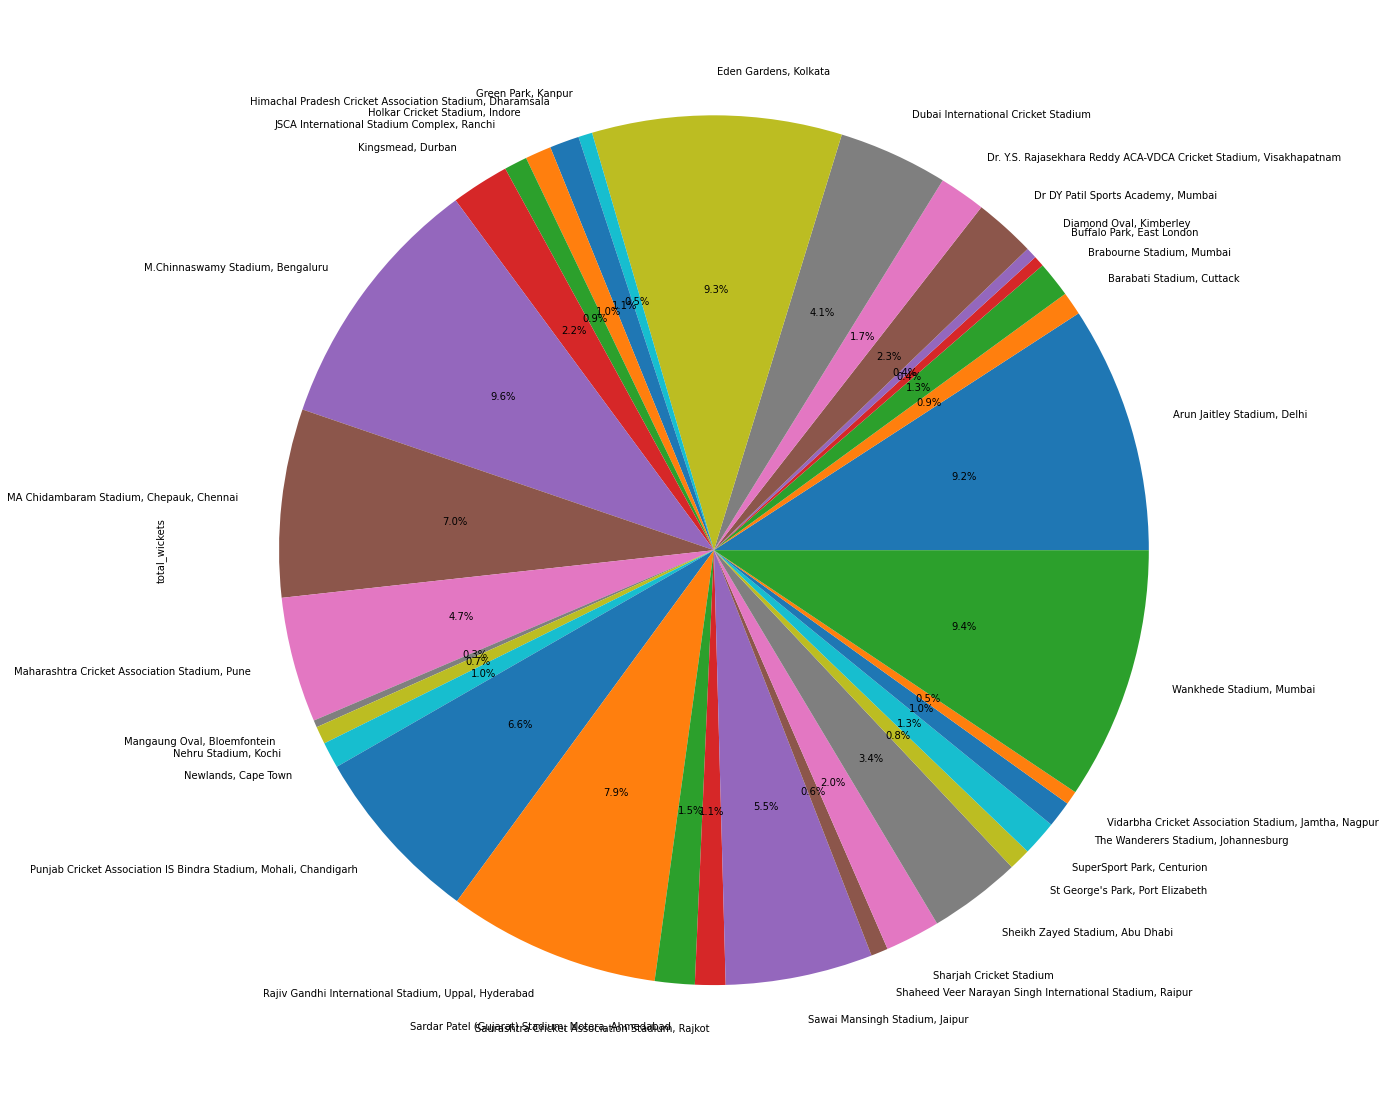

In [405]:
#Plotting total number of wickets fallen on a venue on a pie chart
plot1 = temp.plot.pie(y='total_wickets', figsize=(20, 20),legend =False,autopct='%0.1f%%')

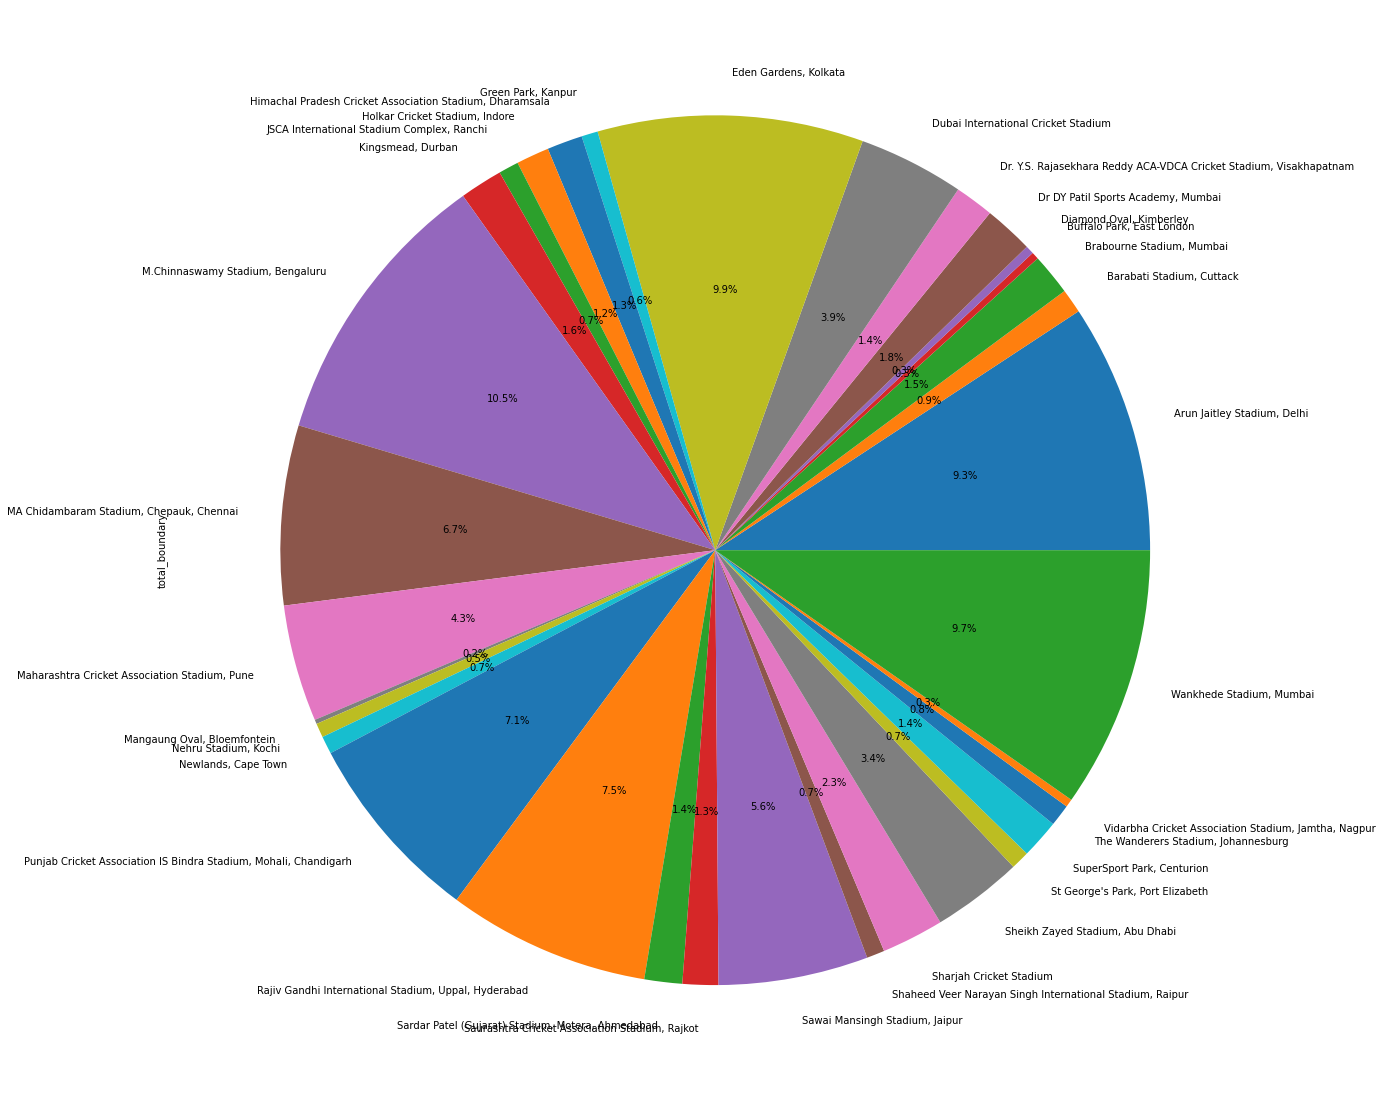

In [406]:
#Plotting total number of boundary scored on a venue on a pie chart
plot2 = temp.plot.pie(y='total_boundary', figsize=(20, 20),legend =False,autopct='%0.1f%%')